In [1]:
import pickle as pkl
from utils import process
import networkx as nx
import numpy as np
import pandas as pd
import scipy.sparse as sp

def load_dblp(sc=3):
    data = pkl.load(open("data/dblp.pkl", "rb"))
    label = data['label']

    adj1 = data["PAP"] + np.eye(data["PAP"].shape[0])*sc
    adj2 = data["PPrefP"] + np.eye(data["PPrefP"].shape[0])*sc
    adj3 = data["PATAP"] + np.eye(data["PATAP"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)
    adj3 = sp.csr_matrix(adj3)

    adj_list = [adj1, adj2, adj3]

    truefeatures = data['feature'].astype(float)
#     truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test

In [2]:
# adj_list, truefeatures, label, idx_train, idx_val, idx_test = process.load_amazon(3)
adj_list, truefeatures, label, idx_train, idx_val, idx_test = load_dblp(0)

In [3]:
label

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [4]:
truefeatures = process.preprocess_features(truefeatures)

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [ ]:
truefeatures

In [ ]:
truefeatures[0].shape[1]

In [20]:
features

<1x14 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in List of Lists format>

In [21]:
features[0].shape[1]

14

In [16]:
import torch
torch.FloatTensor(truefeatures)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [3]:
data['MDM'].shape

NameError: name 'data' is not defined

In [ ]:
data = pkl.load(open("data/imdb.pkl", "rb"))
data

In [ ]:
train, validate, test = np.split(np.arange(1, n_node+1)[np.random.permutation(n_node)], 
                                 [int(.7*n_node), int(.8*n_node)])

In [5]:
def load_dblp(sc=3):
    data = pkl.load(open("data/dblp.pkl", "rb"))
    label = data['label']

    adj1 = data["PAP"] + np.eye(data["PAP"].shape[0])*sc
    adj2 = data["PPrefP"] + np.eye(data["PPrefP"].shape[0])*sc
    adj3 = data["PATAP"] + np.eye(data["PATAP"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)
    adj3 = sp.csr_matrix(adj3)

    adj_list = [adj1, adj2, adj3]

    truefeatures = data['feature'].astype(float)
    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test

In [12]:
PATH = r'..\..\N2VP_221212\Data\input\\'
SC = 0

FILES = [('BivarCopula.edg', 'unweighted'), 
             ('BivarCopula_2D.edg', 'unweighted'), 
             ('BivarCopula_L1.edg', 'unweighted'), 
             ('Granger_11D.edg', 'unweighted'),
             ('Granger_6D.edg', 'unweighted'), 
             ('Granger_VL.edg', 'unweighted'),
             ('Kendall_AbsGreater05.edg', 'unweighted'), 
             ('Kendall_AbsGreater02.edg', 'unweighted'), 
             ('Kendall_AbsGreater01.edg', 'unweighted'), 
             ('Kendall_Positive.edg', 'unweighted'),
             ('Kendall_Weighted.edg', 'weighted'), 
             ('Pearson_AbsGreater05.edg', 'unweighted'),
             ('Pearson_AbsGreater02.edg', 'unweighted'),
             ('Pearson_AbsGreater01.edg', 'unweighted'),
             ('Pearson_Positive.edg', 'unweighted'), 
             ('Pearson_Weighted.edg', 'weighted'),
             ('Spearman_AbsGreater05.edg', 'unweighted'), 
             ('Spearman_AbsGreater02.edg', 'unweighted'), 
             ('Spearman_AbsGreater01.edg', 'unweighted'), 
             ('Spearman_Positive.edg', 'unweighted'),
             ('Spearman_Weighted.edg', 'weighted')]

NODE_NAME = [('SET', 'EQ'), 
             ('MAI', 'EQ'), 
             ('ZeroShort', 'FI'), 
             ('ZeroLong', 'FI'), 
             ('CorpBond', 'FI'), 
             ('THB', 'FX'),
             ('EquityFlow', 'EQ'), 
             ('BondFlow', 'FI'), 
             ('EMAsiaEquity', 'EQ'), 
             ('SP500', 'EQ'), 
             ('EMBond', 'FI'),
             ('USBond', 'FI'), 
             ('EMAsiaFX', 'FX'), 
             ('USD', 'FX')]

n_node = len(NODE_NAME)

label = pd.DataFrame(NODE_NAME, columns=['market', 'label'])
label = pd.get_dummies(label['label']).values

features = np.ones(n_node)
features = sp.lil_matrix(features)

graph_data = {}
nodelist = [i for i in range(1, 15)]
for file, mode in FILES:
    name = file.split('.')[0]
    if mode == 'weighted':
        G = nx.read_edgelist(PATH + file, nodetype=int, data=(('weight', float),))
    else:
        G = nx.read_edgelist(PATH + file, nodetype=int)
    G.add_nodes_from(set(nodelist) - set(G.nodes()))
    G = nx.adjacency_matrix(G, nodelist, weight='weight') + np.eye(len(G))*SC
    G = sp.csr_matrix(G)
    graph_data[name] = G
    
train, validate, test = np.split(np.arange(1, n_node+1)[np.random.permutation(n_node)], 
                                 [int(.7*n_node), int(.8*n_node)])

In [13]:
G = nx.read_edgelist(PATH + 'BivarCopula.edg', nodetype=int)

In [17]:
PATH = r'..\..\node2vec_exp_221210\Data\input\\'

def prepare_data(path, sc=3, seed=27):
    FILES = [('BivarCopula.edg', 'unweighted'), 
             ('BivarCopula_2D.edg', 'unweighted'), 
             ('BivarCopula_L1.edg', 'unweighted'), 
             ('Granger_11D.edg', 'unweighted'),
             ('Granger_6D.edg', 'unweighted'), 
             ('Granger_VL.edg', 'unweighted'),
             ('Kendall_AbsGreater05.edg', 'unweighted'), 
             ('Kendall_AbsGreater02.edg', 'unweighted'), 
             ('Kendall_Positive.edg', 'unweighted'),
             ('Kendall_Weighted.edg', 'weighted'), 
             ('Pearson_AbsGreater05.edg', 'unweighted'),
             ('Pearson_AbsGreater02.edg', 'unweighted'),
             ('Pearson_Positive.edg', 'unweighted'), 
             ('Pearson_Weighted.edg', 'weighted'),
             ('Spearman_AbsGreater05.edg', 'unweighted'), 
             ('Spearman_AbsGreater02.edg', 'unweighted'), 
             ('Spearman_Positive.edg', 'unweighted'),
             ('Spearman_Weighted.edg', 'weighted')]

    NODE_NAME = [('SET', 'EQ'), 
                 ('MAI', 'EQ'), 
                 ('ZeroShort', 'FI'), 
                 ('ZeroLong', 'FI'), 
                 ('CorpBond', 'FI'), 
                 ('THB', 'FX'),
                 ('EquityFlow', 'EQ'), 
                 ('BondFlow', 'FI'), 
                 ('EMAsiaEquity', 'EQ'), 
                 ('SP500', 'EQ'), 
                 ('EMBond', 'FI'),
                 ('USBond', 'FI'), 
                 ('EMAsiaFX', 'FX'), 
                 ('USD', 'FX')]

    n_node = len(NODE_NAME)

    label = pd.DataFrame(NODE_NAME, columns=['market', 'label'])
    label = pd.get_dummies(label['label']).values

    features = np.ones(n_node).astype(float).reshape(14, 1)
    features = sp.lil_matrix(features)

    graph_data = {}
    nodelist = [i for i in range(1, 15)]
    for file, mode in FILES:
        name = file.split('.')[0]
        if mode == 'weighted':
            G = nx.read_edgelist(path + file, nodetype=int, data=(('weight', float),))
        else:
            G = nx.read_edgelist(path + file, nodetype=int)
        G.add_nodes_from(set(nodelist) - set(G.nodes()))
        G = nx.adjacency_matrix(G, nodelist, weight='weight') + np.eye(len(G))*sc
        G = sp.csr_matrix(G)
        graph_data[name] = G
        
    #train, validate, test = np.split(np.arange(n_node)[np.random.RandomState(seed=27).permutation(n_node)], 
    #                                 [int(.7*n_node), int(.8*n_node)])
    train = np.arange(n_node)
    validate = np.arange(n_node)
    test = np.arange(n_node)
    return graph_data, features, label, train, validate, test
    

def pack_exp1a(graph_data):
    return [graph_data['Pearson_Weighted'], graph_data['Spearman_Weighted'], graph_data['Kendall_Weighted']]

def pack_exp1b(graph_data):
    return [graph_data['Pearson_Positive'], graph_data['Spearman_Positive'], graph_data['Kendall_Positive']]

def pack_exp1c(graph_data):
    return [graph_data['Pearson_AbsGreater02'], graph_data['Spearman_AbsGreater02'], graph_data['Kendall_AbsGreater02']]

def pack_exp1d(graph_data):
    return [graph_data['Pearson_AbsGreater05'], graph_data['Spearman_AbsGreater05'], graph_data['Kendall_AbsGreater05']]

def pack_exp2a(graph_data):
    return [graph_data['Pearson_Weighted'], graph_data['Pearson_Positive'], graph_data['Pearson_AbsGreater02'], graph_data['Pearson_AbsGreater05']]

def pack_exp2b(graph_data):
    return [graph_data['Spearman_Weighted'], graph_data['Spearman_Positive'], graph_data['Spearman_AbsGreater02'], graph_data['Spearman_AbsGreater05']]

def pack_exp2c(graph_data):
    return [graph_data['Kendall_Weighted'], graph_data['Kendall_Positive'], graph_data['Kendall_AbsGreater02'], graph_data['Kendall_AbsGreater05']]

def pack_exp3(graph_data):
    return [graph_data['BivarCopula'], graph_data['BivarCopula_L1'], graph_data['BivarCopula_2D']]

def pack_exp4(graph_data):
    return [graph_data['Granger_6D'], graph_data['Granger_11D'], graph_data['Granger_VL']]

def pack_exp5(graph_data):
    return [graph_data['BivarCopula_2D'], graph_data['Granger_VL']]

def pack_exp6(graph_data):
    return [graph_data['Pearson_Weighted'], graph_data['Spearman_Weighted'], graph_data['Kendall_Weighted'], 
            graph_data['BivarCopula_2D'], graph_data['Granger_VL']]

def pack_exp7(graph_data):
    return [graph_data['Pearson_Positive'], graph_data['Spearman_Positive'], graph_data['Kendall_Positive'], 
            graph_data['BivarCopula_2D'], graph_data['Granger_VL']]

def pack_exp8(graph_data):
    return [graph_data['Pearson_AbsGreater02'], graph_data['Spearman_AbsGreater02'], graph_data['Kendall_AbsGreater02'], 
            graph_data['BivarCopula_2D'], graph_data['Granger_VL']]

def pack_exp9(graph_data):
    return [graph_data['Pearson_AbsGreater05'], graph_data['Spearman_AbsGreater05'], graph_data['Kendall_AbsGreater05'], 
            graph_data['BivarCopula_2D'], graph_data['Granger_VL']]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
def prepare_data(path, sc=3, seed=27):
    FILES = [('BivarCopula.edg', 'unweighted', nx.DiGraph), 
             ('BivarCopula_2D.edg', 'unweighted', nx.DiGraph), 
             ('BivarCopula_L1.edg', 'unweighted', nx.DiGraph), 
             ('Granger_11D.edg', 'unweighted', nx.DiGraph),
             ('Granger_6D.edg', 'unweighted', nx.DiGraph), 
             ('Granger_VL.edg', 'unweighted', nx.DiGraph),
             ('Kendall_AbsGreater05.edg', 'unweighted', nx.Graph), 
             ('Kendall_AbsGreater02.edg', 'unweighted', nx.Graph), 
             ('Kendall_AbsGreater01.edg', 'unweighted', nx.Graph), 
             ('Kendall_Positive.edg', 'unweighted', nx.Graph),
             ('Kendall_Weighted.edg', 'weighted', nx.Graph), 
             ('Pearson_AbsGreater05.edg', 'unweighted', nx.Graph),
             ('Pearson_AbsGreater02.edg', 'unweighted', nx.Graph),
             ('Pearson_AbsGreater01.edg', 'unweighted', nx.Graph),
             ('Pearson_Positive.edg', 'unweighted', nx.Graph), 
             ('Pearson_Weighted.edg', 'weighted', nx.Graph),
             ('Spearman_AbsGreater05.edg', 'unweighted', nx.Graph), 
             ('Spearman_AbsGreater02.edg', 'unweighted', nx.Graph), 
             ('Spearman_AbsGreater01.edg', 'unweighted', nx.Graph), 
             ('Spearman_Positive.edg', 'unweighted', nx.Graph),
             ('Spearman_Weighted.edg', 'weighted', nx.Graph)]
    
    graph_data = {}
    nodelist = [i for i in range(1, 15)]
    for file, mode, graph_constructor in FILES:
        name = file.split('.')[0]
        if mode == 'weighted':
            G = nx.read_edgelist(path + file, nodetype=int, data=(('weight', float),), create_using=graph_constructor)
        else:
            G = nx.read_edgelist(path + file, nodetype=int, create_using=graph_constructor)
        G.add_nodes_from(set(nodelist) - set(G.nodes()))
        G = nx.adjacency_matrix(G, nodelist, weight='weight') + np.eye(len(G))*sc
        graph_data[name] = G

    return graph_data

def format_dataframe(graph_data, datasets, market_names, df_emb):
    df_header = pd.DataFrame(graph_data[datasets[0]], index=market_names, columns=market_names)
    df_header = df_header.reset_index().rename(columns={'index':datasets[0]})
    data = [df_header]
    
    for dataset in datasets[1:]:
        df_temp = pd.DataFrame(graph_data[dataset], index=market_names, columns=market_names)
        df_temp = df_temp.reset_index().rename(columns={'index':dataset})
        df_temp = pd.DataFrame(np.concatenate([np.array([df_temp.columns.values]), df_temp.values]), 
                               columns=[datasets[0]] + market_names)
        data.append(df_temp)
        
    df = pd.concat(data)
    df = df.reset_index(drop=True)
    df = pd.concat([df, df_emb], axis=1)
    
    return df

In [7]:
NODE_NAME = ['SET', 'MAI', 'ZeroShort', 'ZeroLong', 'CorpBond', 
             'THB', 'EquityFlow', 'BondFlow', 'EMAsiaEquity', 
             'SP500', 'EMBond', 'USBond', 'EMAsiaFX', 'USD']
EXPERIMENTS = [('exp1a', ['Pearson_Weighted', 'Spearman_Weighted', 'Kendall_Weighted']),
               ('exp1b', ['Pearson_Positive', 'Spearman_Positive', 'Kendall_Positive']),
               ('exp1c', ['Pearson_AbsGreater02', 'Spearman_AbsGreater02', 'Kendall_AbsGreater02']),
               ('exp1d', ['Pearson_AbsGreater05', 'Spearman_AbsGreater05', 'Kendall_AbsGreater05']),
               ('exp2a', ['Pearson_Weighted', 'Pearson_Positive', 'Pearson_AbsGreater02', 'Pearson_AbsGreater05']),
               ('exp2b', ['Spearman_Weighted', 'Spearman_Positive', 'Spearman_AbsGreater02', 'Spearman_AbsGreater05']),
               ('exp2c', ['Kendall_Weighted', 'Kendall_Positive', 'Kendall_AbsGreater02', 'Kendall_AbsGreater05']),
               ('exp3', ['BivarCopula', 'BivarCopula_L1', 'BivarCopula_2D']),
               ('exp4', ['Granger_6D', 'Granger_11D', 'Granger_VL']),
               ('exp5', ['BivarCopula_2D', 'Granger_VL']),
               ('exp6', ['Pearson_Weighted', 'Spearman_Weighted', 'Kendall_Weighted', 'BivarCopula_2D', 'Granger_VL']),
               ('exp7', ['Pearson_Positive', 'Spearman_Positive', 'Kendall_Positive', 'BivarCopula_2D', 'Granger_VL']),
               ('exp8', ['Pearson_AbsGreater02', 'Spearman_AbsGreater02', 'Kendall_AbsGreater02', 
                         'BivarCopula_2D', 'Granger_VL']),
               ('exp9', ['Pearson_AbsGreater05', 'Spearman_AbsGreater05', 'Kendall_AbsGreater05', 
                         'BivarCopula_2D', 'Granger_VL'])
              ]
 
EXPERIMENTS = [('PearsonKendall', ['Pearson_AbsGreater01', 'Kendall_AbsGreater01']),
               ('PearsonKendallCopulaGranger', ['Pearson_AbsGreater01', 'Kendall_AbsGreater01', 'BivarCopula_2D', 'Granger_VL']),
               ('PearsonCopula', ['Pearson_AbsGreater01', 'BivarCopula_2D']),
               ('PearsonGranger', ['Pearson_AbsGreater01', 'Granger_VL']),
               ('KendallCopula', ['Kendall_AbsGreater01', 'BivarCopula_2D']),
               ('KendallGranger', ['Kendall_AbsGreater01', 'Granger_VL']),
               ('CopulaGranger', ['BivarCopula_2D', 'Granger_VL']),
              ]
    
x_min = []
x_max = []
y_min = []
y_max = [] 

path = r'..\..\N2VP_221212\Data\input\\'
graph_data = prepare_data(path, sc=0)

writer = pd.ExcelWriter('./output/Embedding.xlsx', engine='xlsxwriter')
workbook = writer.book
cell_format = workbook.add_format({'border': 1, 'bold': True})

df_emb_result = {}
df_results = pd.DataFrame()
for experiment_name, datasets in EXPERIMENTS:
    df_embs = []
    for dim in [2, 3]:
        columns = [f'HDMI_dim{i}of{dim}' for i in range(1,dim+1)]
        df = pd.read_csv(f'./output/{experiment_name}_dim{dim}.emb', sep='\t', names=columns, skiprows=1)
        df_embs.append(df)
        
        df_result = pd.read_csv(f'./output/{experiment_name}_dim{dim}_result.csv')
        df_results = pd.concat([df_results, df_result])

    df_emb = pd.concat(df_embs, axis=1).reset_index(drop=True)
    x_min.append(df_emb['HDMI_dim1of2'].min())
    x_max.append(df_emb['HDMI_dim1of2'].max())
    y_min.append(df_emb['HDMI_dim2of2'].min())
    y_max.append(df_emb['HDMI_dim2of2'].max())
    
    df = format_dataframe(graph_data, datasets, NODE_NAME, df_emb)
    df_emb_result[experiment_name] = df_emb
    df.to_excel(writer, sheet_name=experiment_name, index=False)
    
    worksheet = writer.sheets[experiment_name]
    for j in range(1, len(datasets)):
        for i in range(len(NODE_NAME)+1):
            worksheet.write((len(NODE_NAME)+1)*j, i, df.iloc[(len(NODE_NAME)+1)*j-1, i],cell_format)
    
df_results.to_excel(writer, sheet_name='All Results', index=False)
writer.close()

x_min = min(x_min)
x_max = max(x_max)
y_min = min(y_min)
y_max = max(y_max)

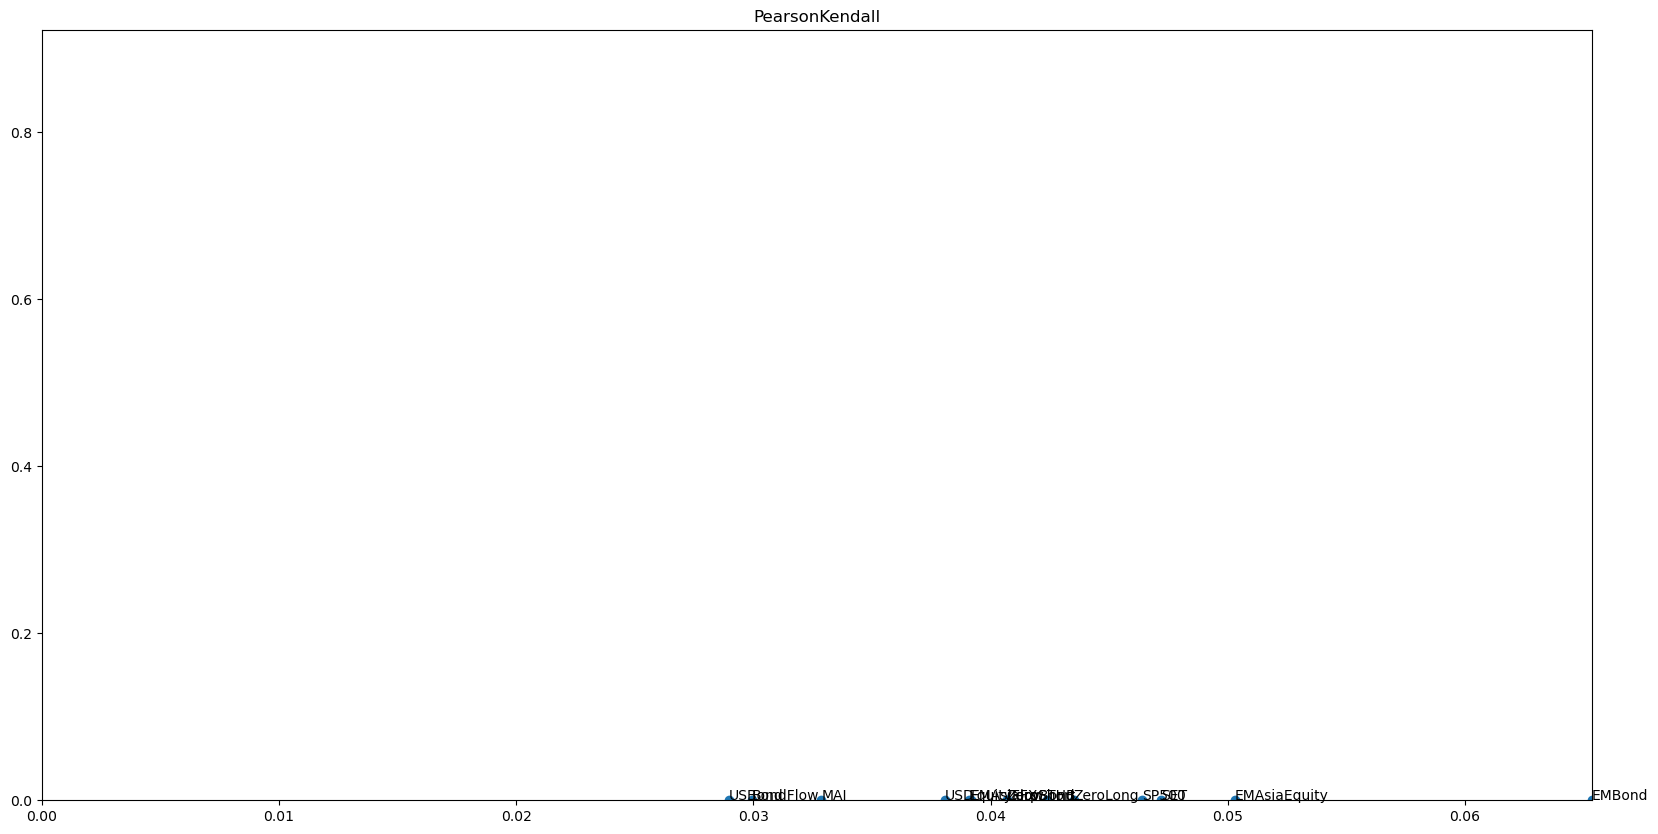

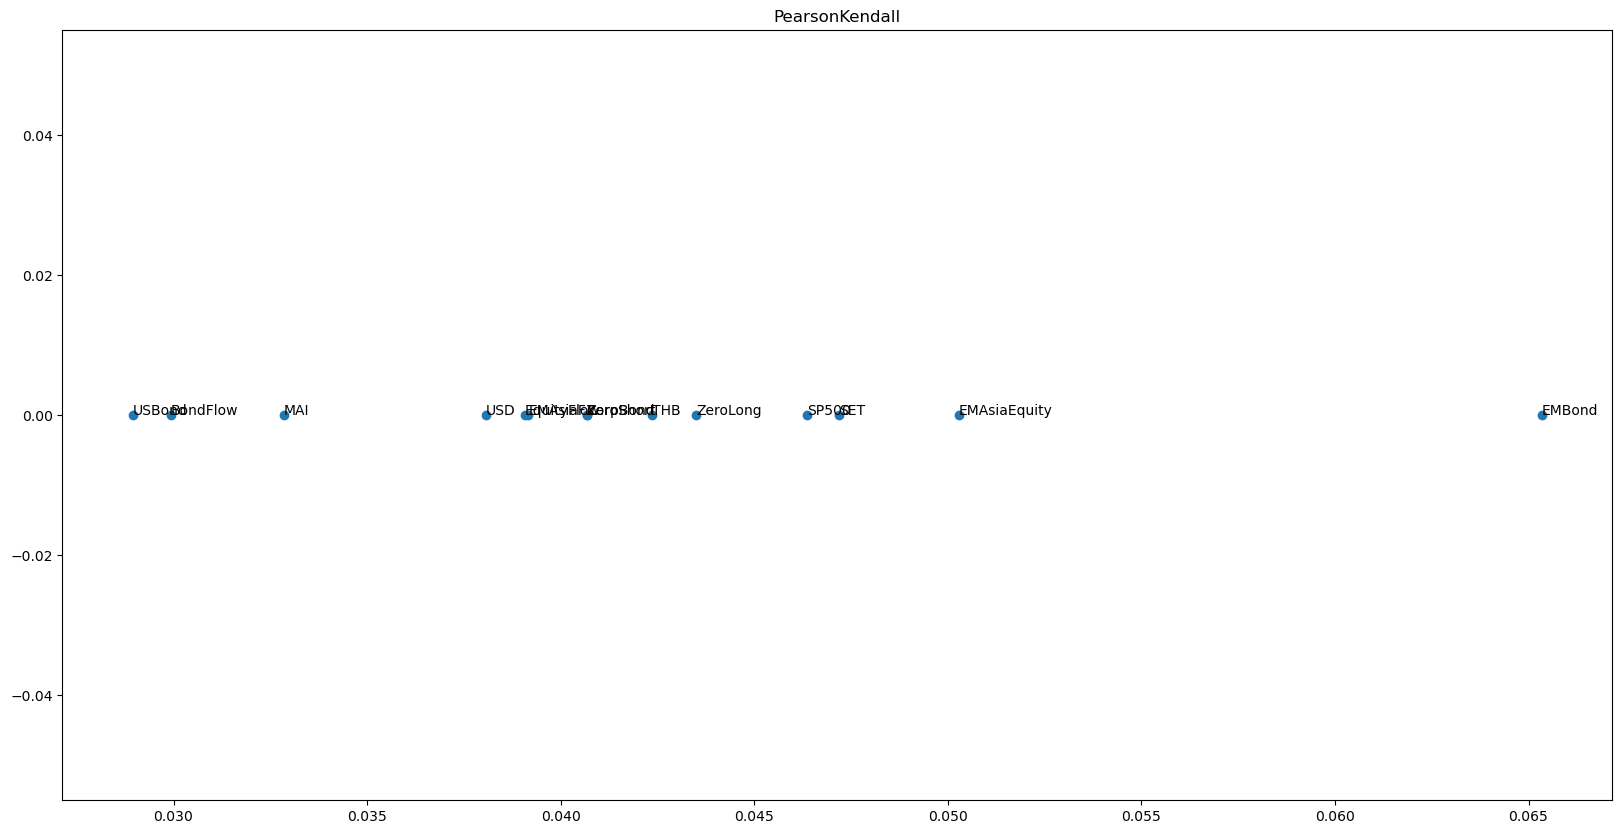

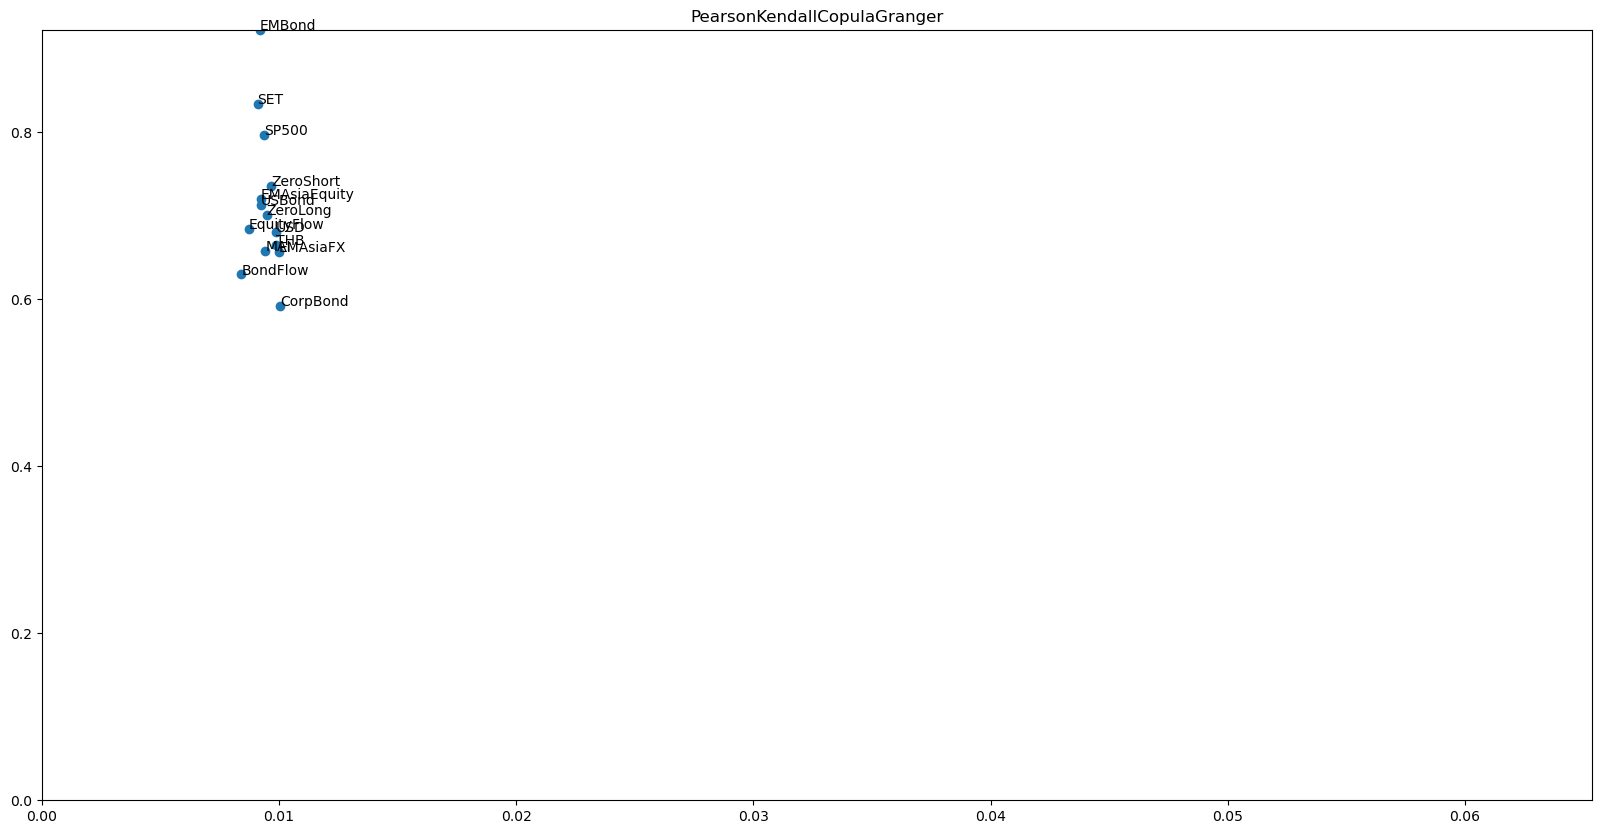

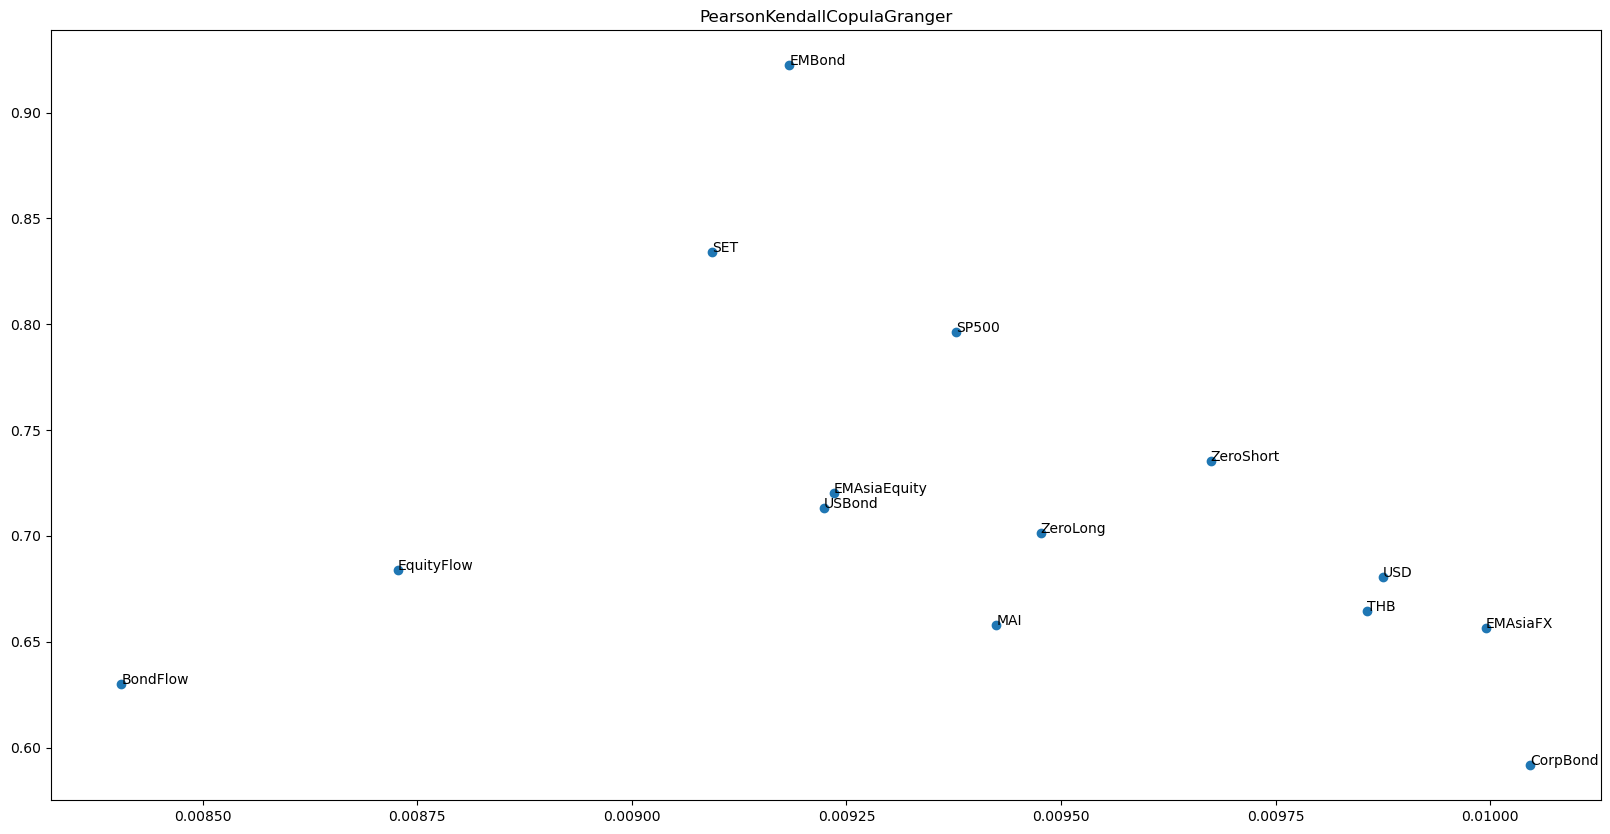

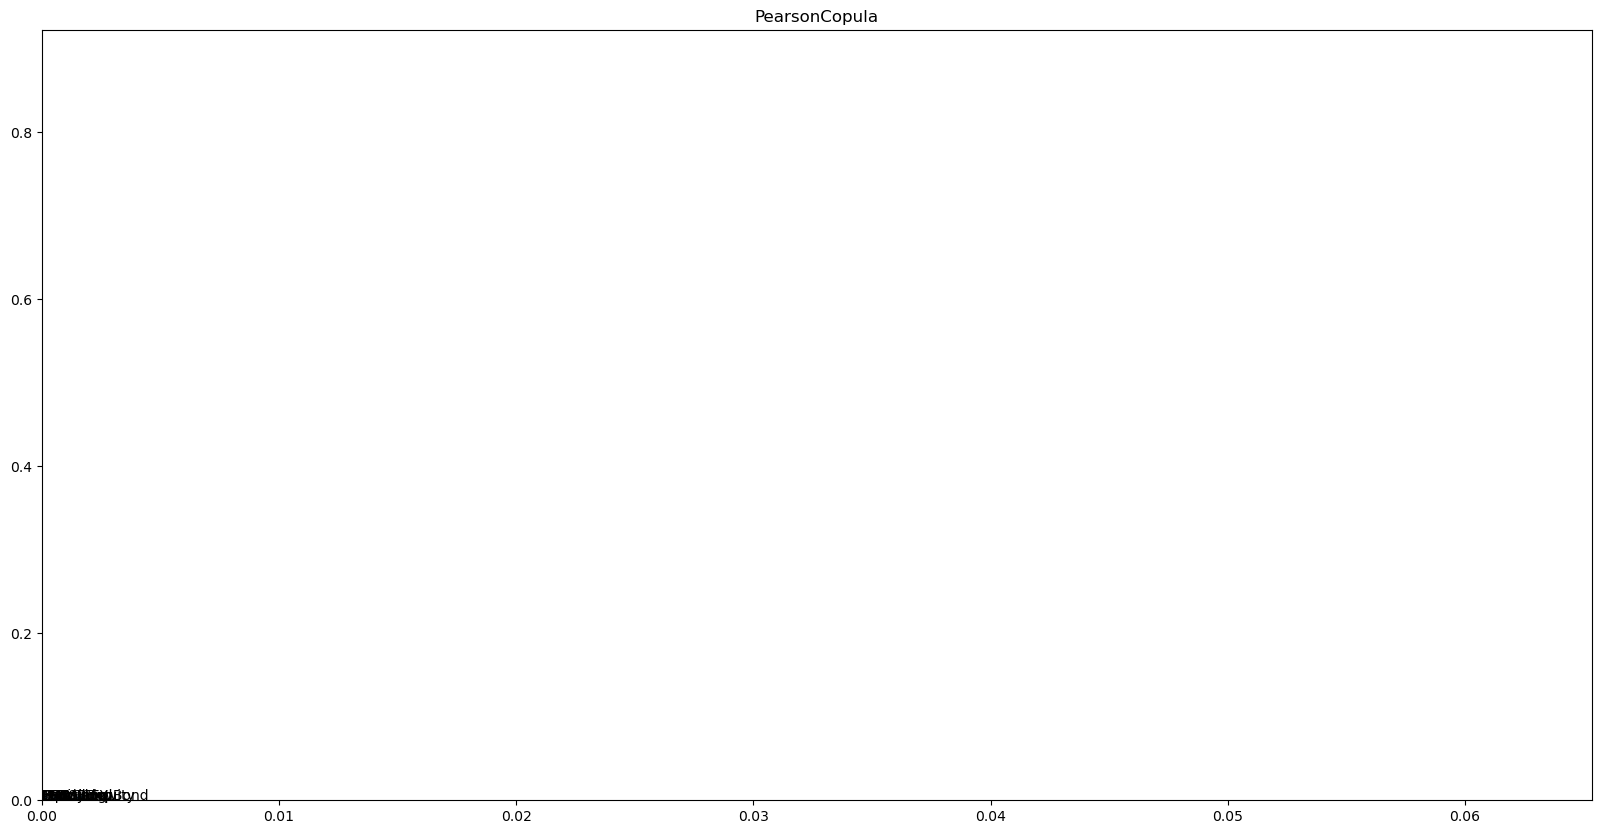

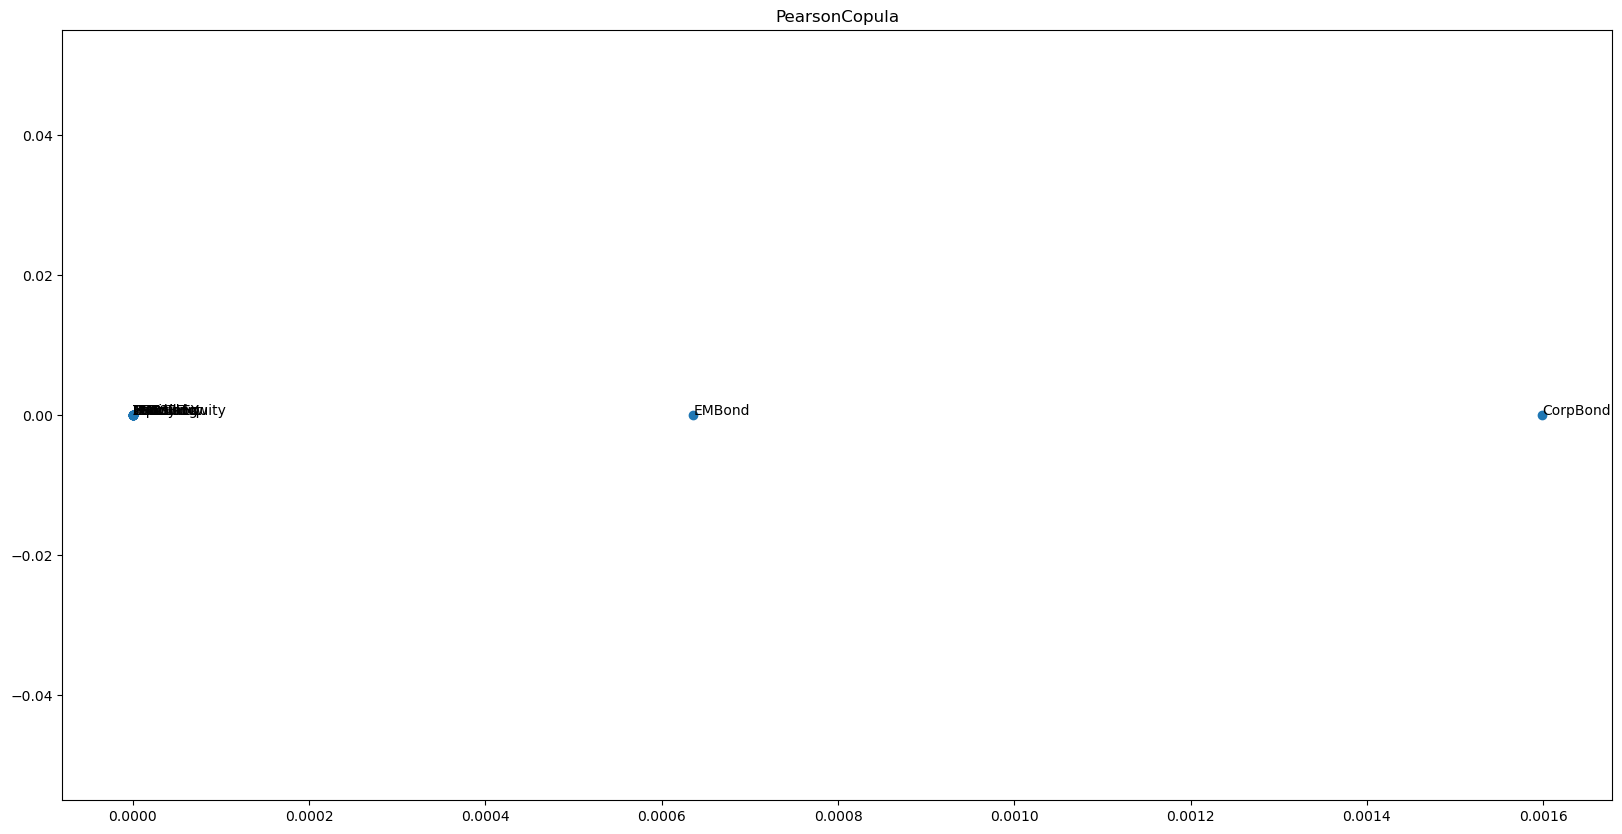

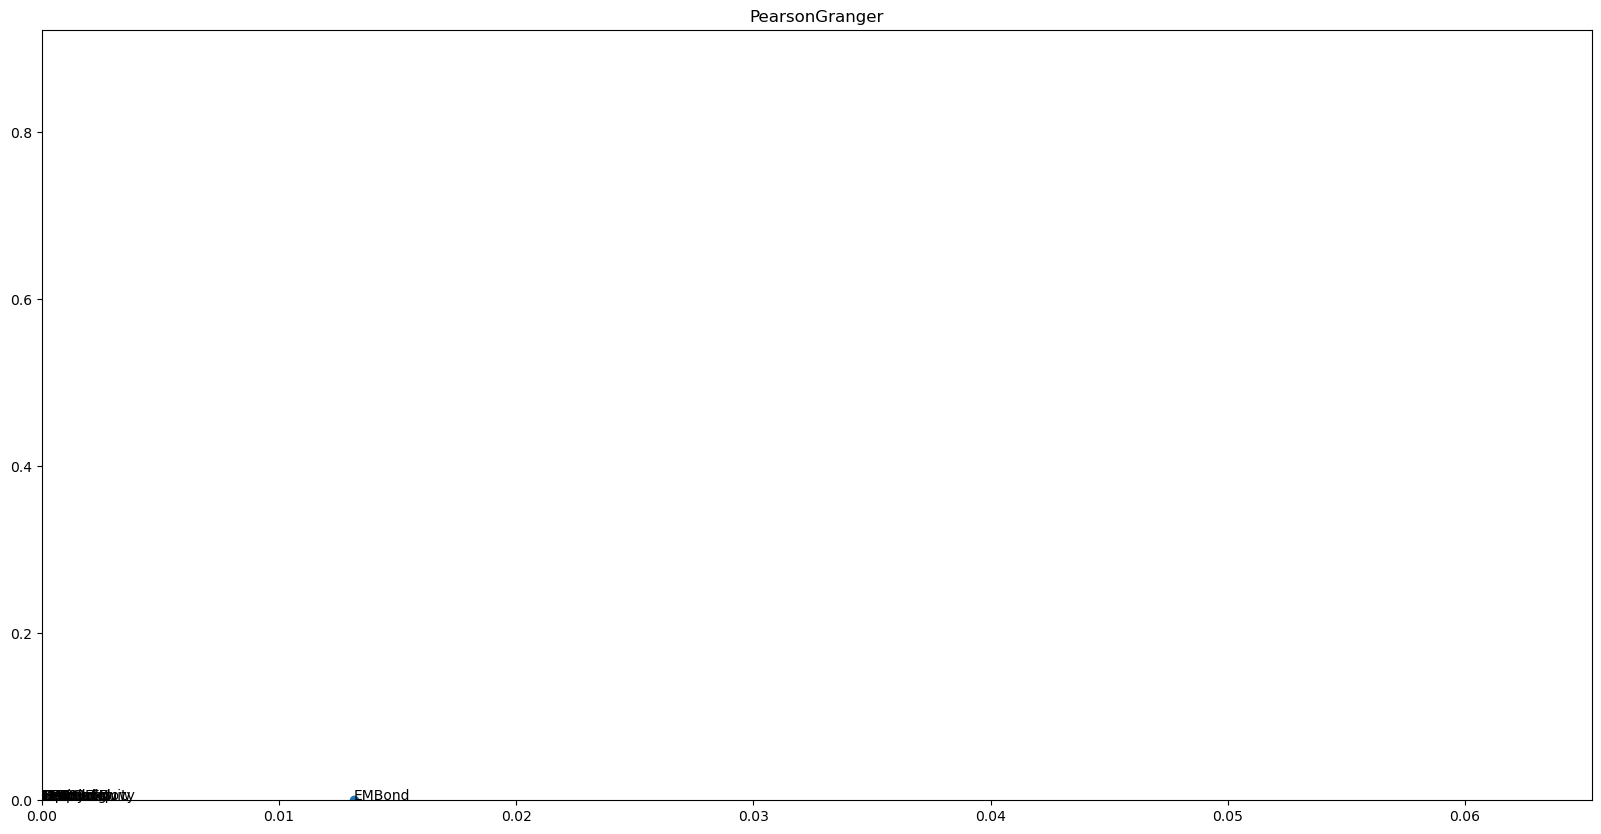

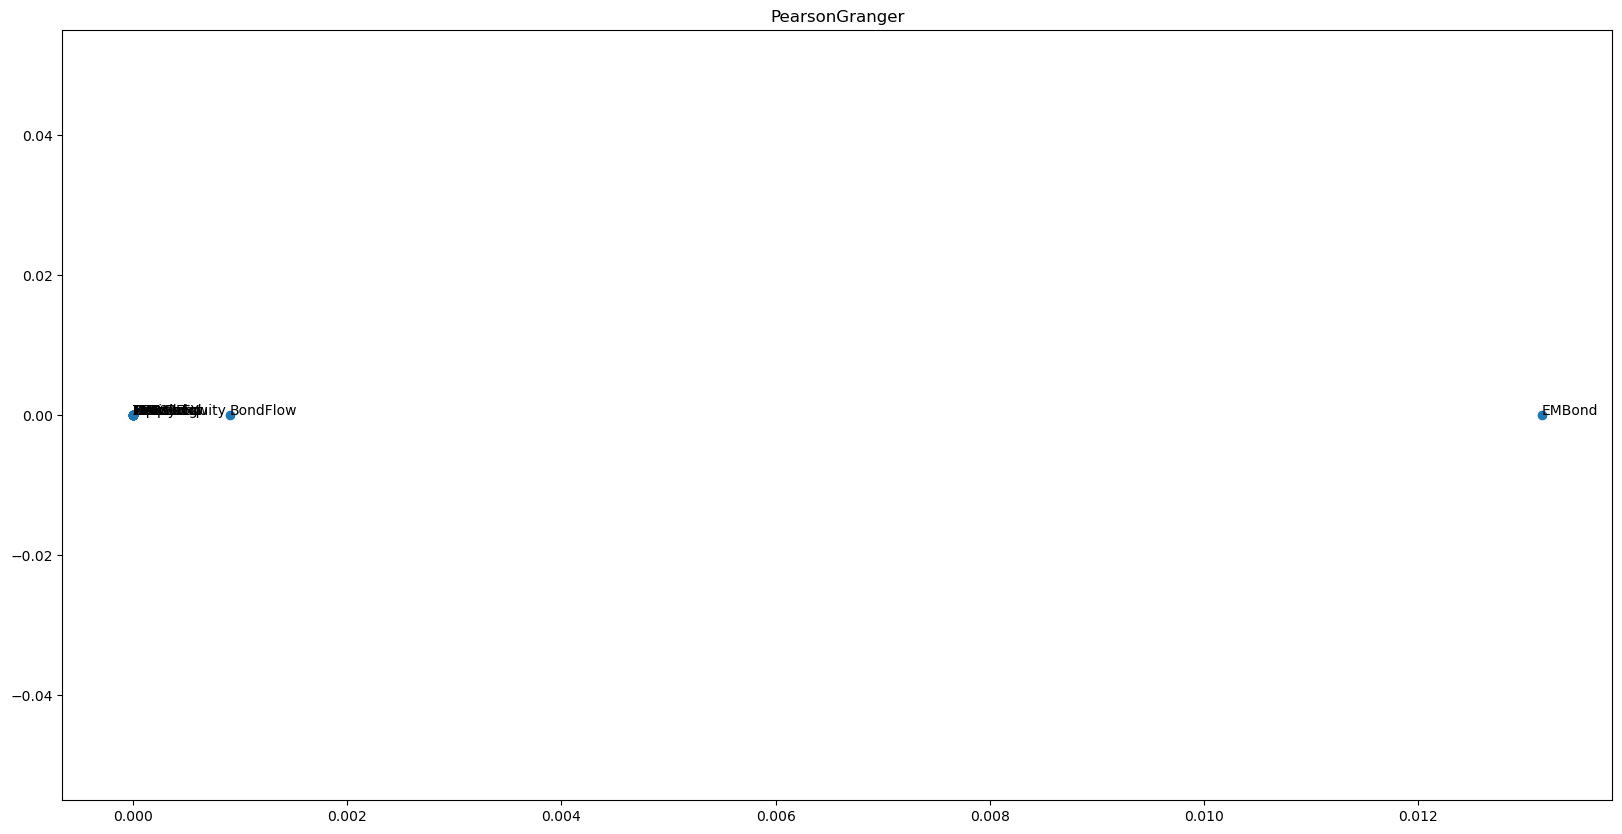

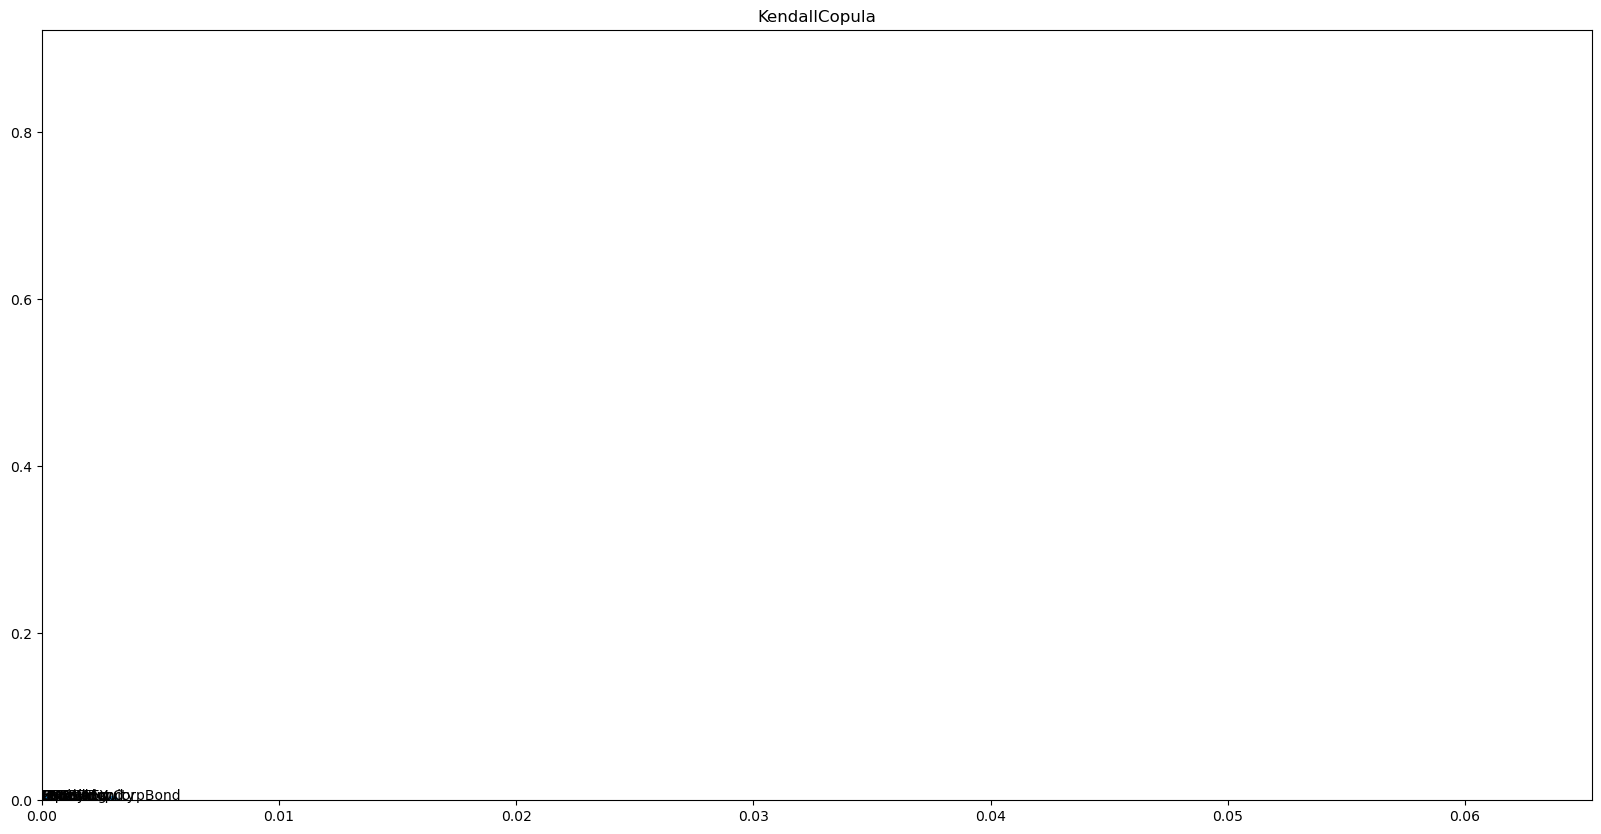

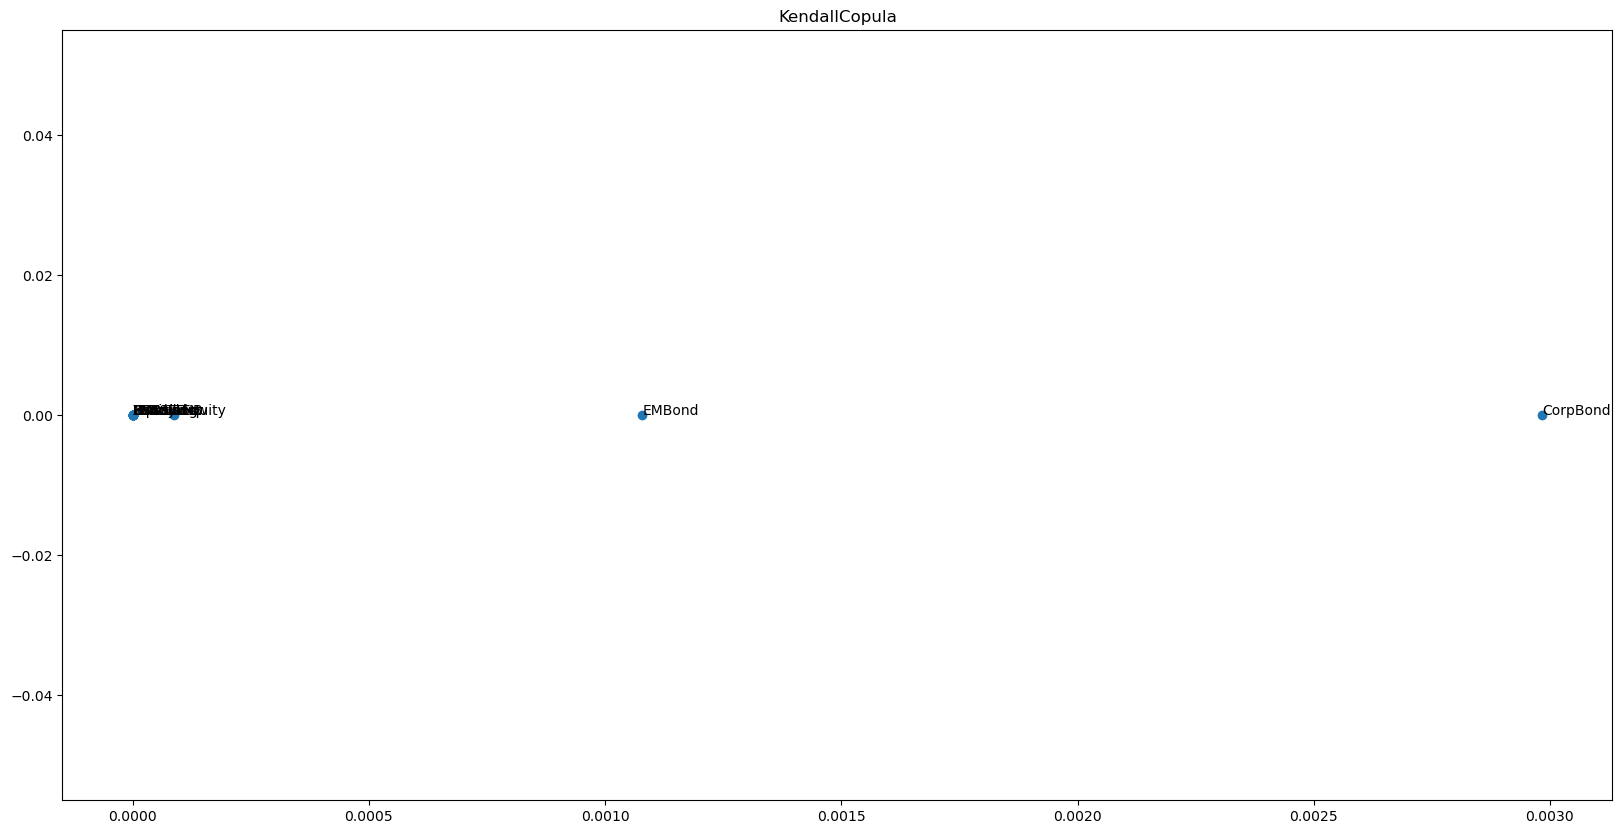

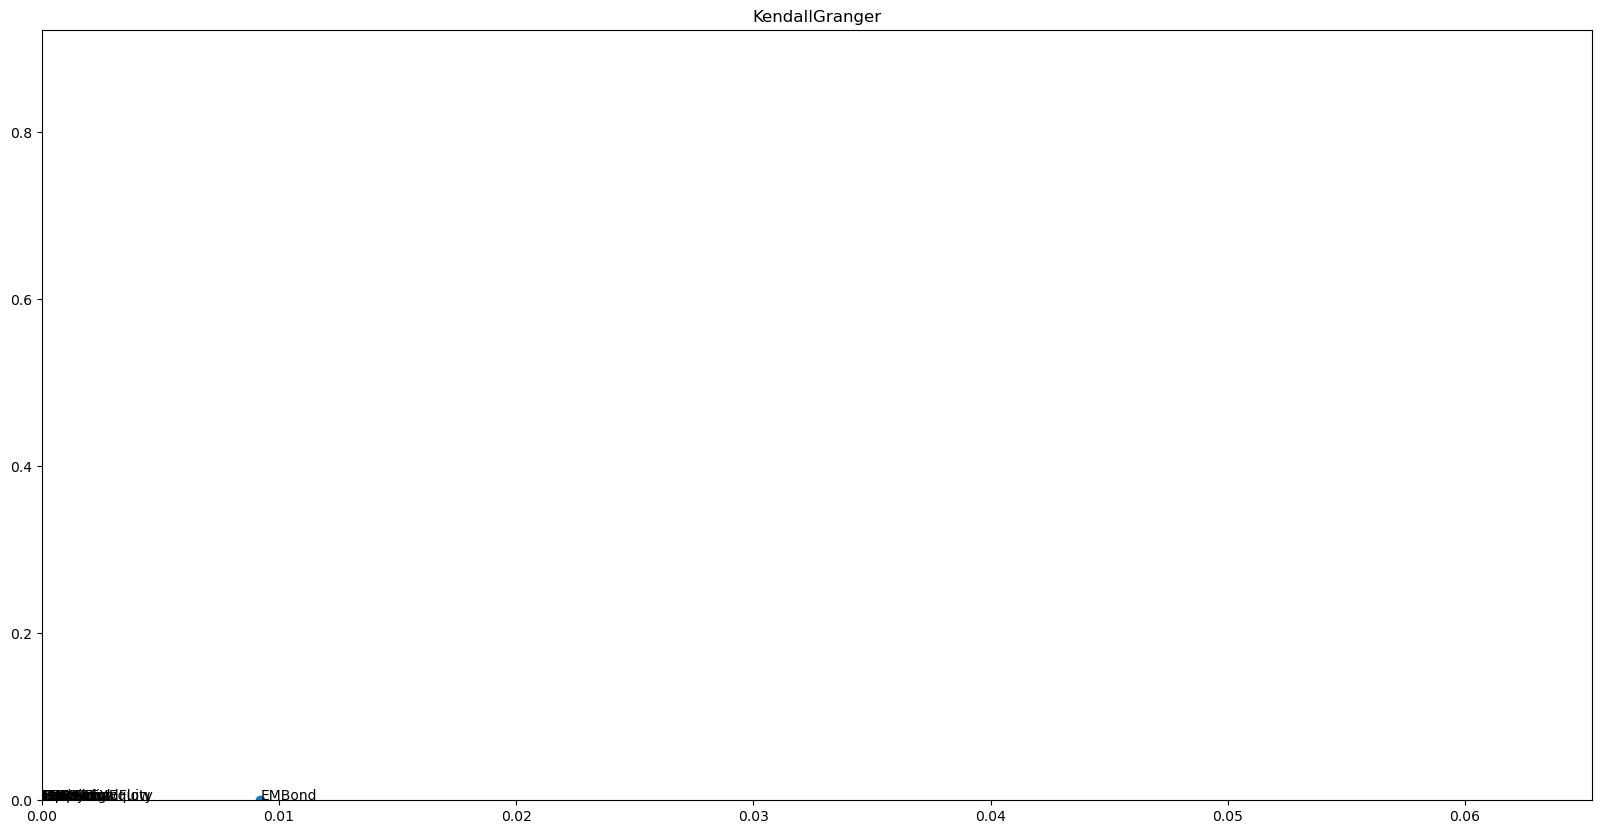

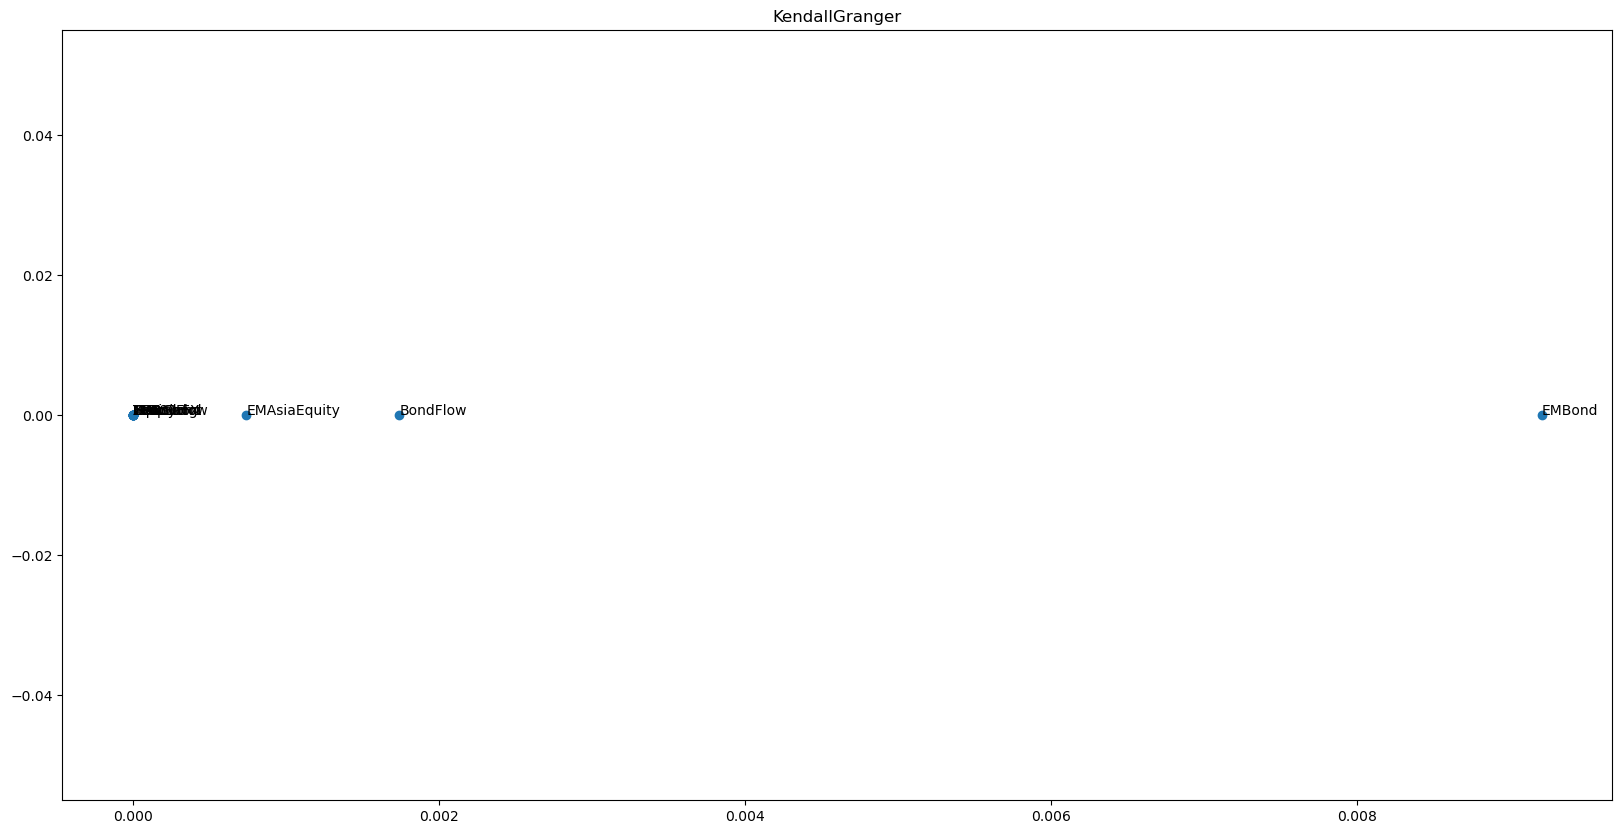

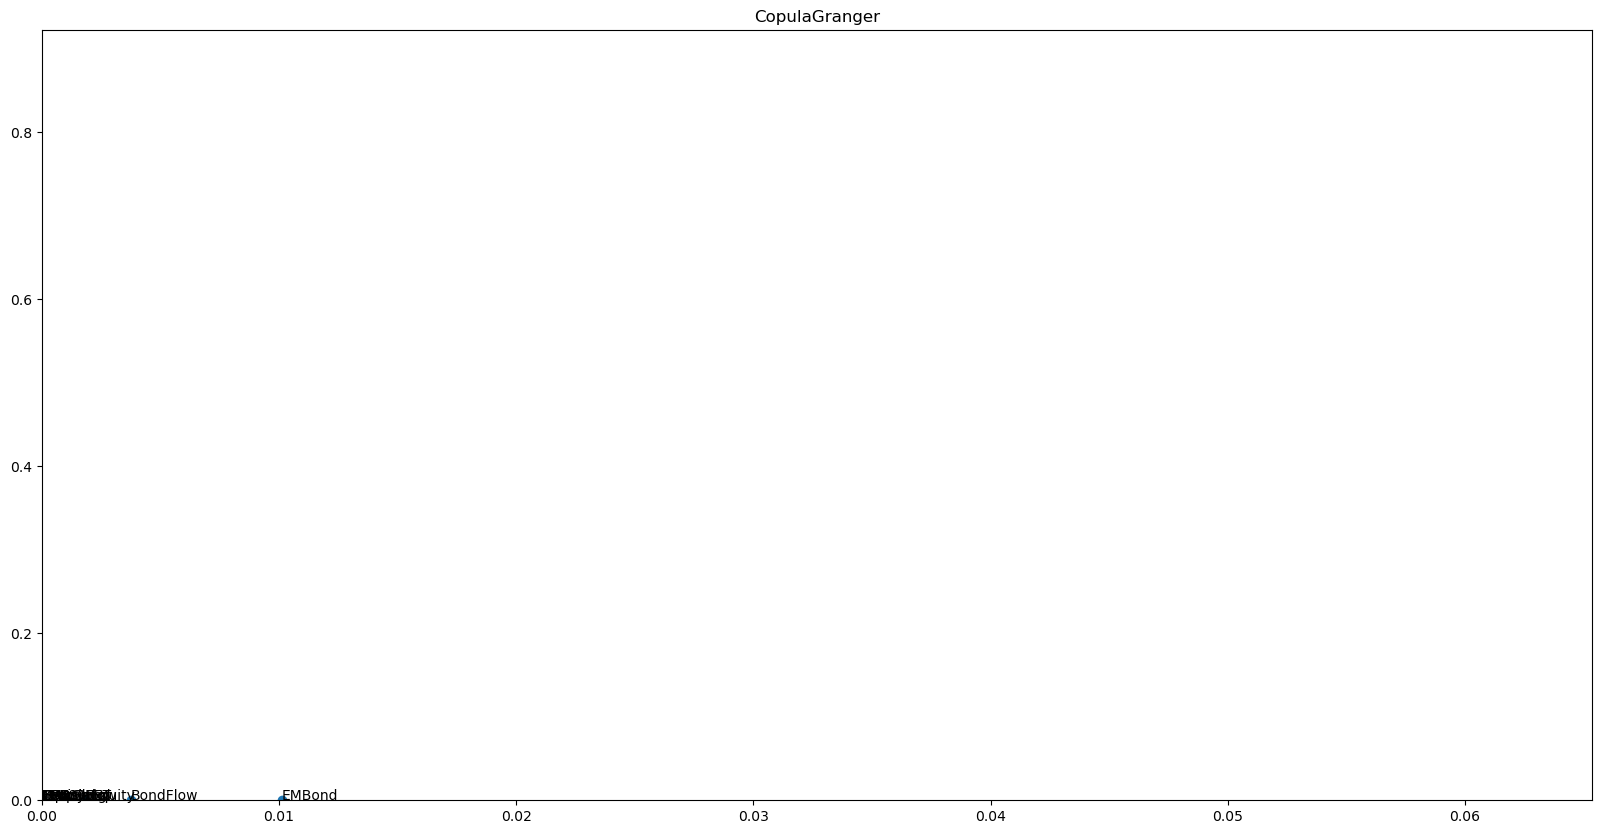

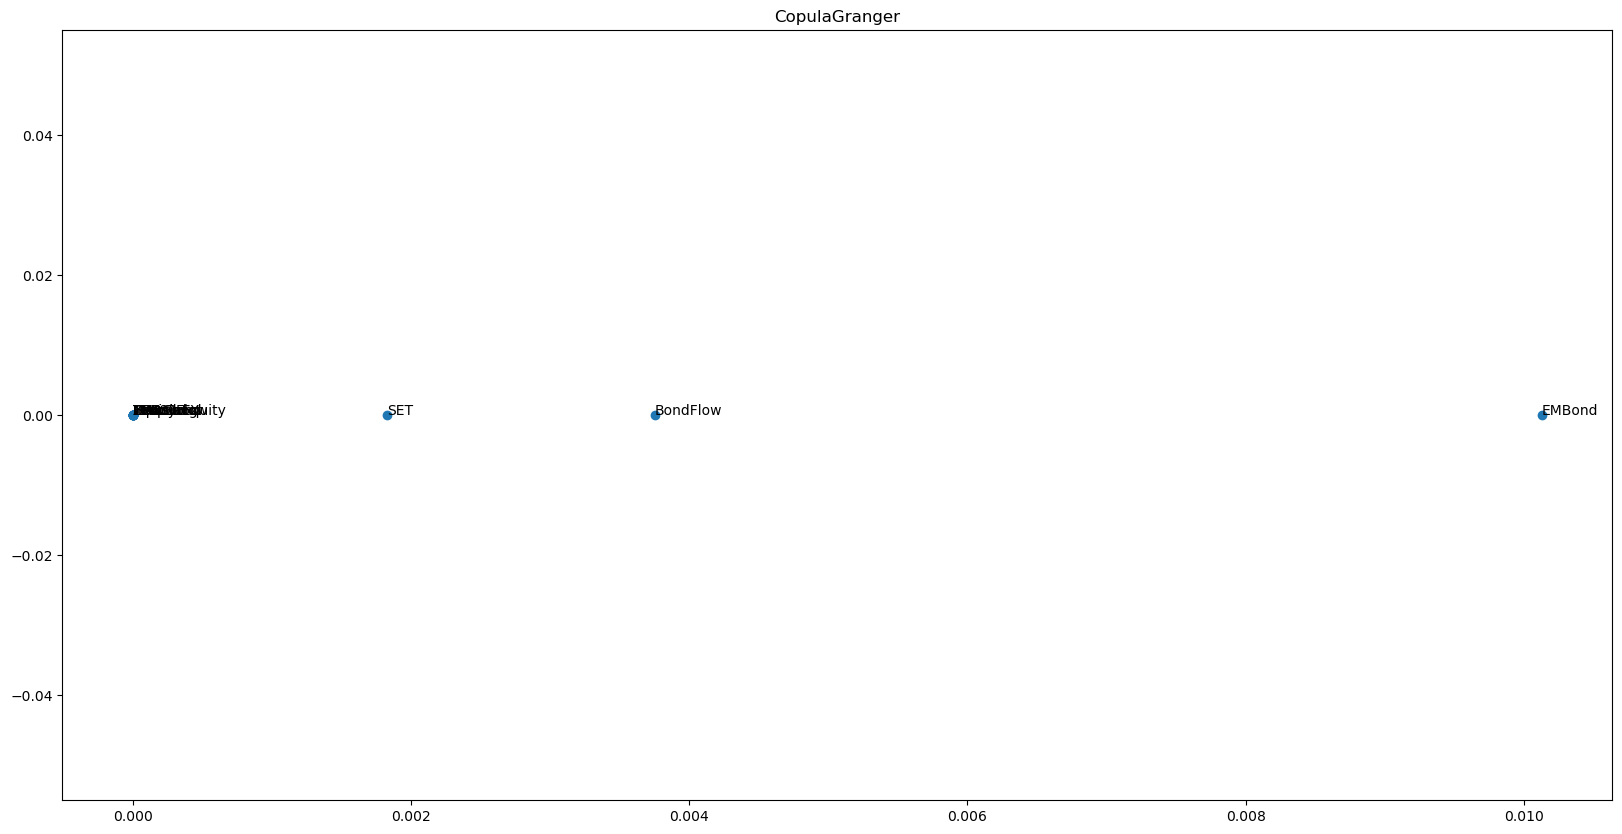

In [8]:
for experiment_name, _ in EXPERIMENTS:
    df_emb = df_emb_result[experiment_name]
    
    plt.subplots(figsize=(20,10))
    plt.title(experiment_name)
    plt.scatter(df_emb['HDMI_dim1of2'], df_emb['HDMI_dim2of2'])
    for i, text in enumerate(NODE_NAME):
        plt.text(df_emb.loc[i, 'HDMI_dim1of2'], df_emb.loc[i, 'HDMI_dim2of2'], text)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.savefig(f'./output/{experiment_name}_dim2.png')
    plt.show()

    plt.subplots(figsize=(20,10))
    plt.title(experiment_name)
    plt.scatter(df_emb['HDMI_dim1of2'], df_emb['HDMI_dim2of2'])
    for i, text in enumerate(NODE_NAME):
        plt.text(df_emb.loc[i, 'HDMI_dim1of2'], df_emb.loc[i, 'HDMI_dim2of2'], text)

    plt.savefig(f'./output/{experiment_name}_dim2_zoom.png')
    plt.show()